## Read in EEG and Biometric data

In [1]:
import mne
import pandas as pd

def read_eeg(vhdr_fname):
    # define list of indicies for non-eeg channels
    misc_list = []
    for i in range(18):
        misc_list.append(i+64)

    # read raw data
    raw = mne.io.read_raw_brainvision(vhdr_fname, misc=misc_list, preload=True,
        verbose=False)
    raw.info['line_freq'] = 500.

    # Set montage
    montage = mne.channels.make_standard_montage('easycap-M1')
    raw.set_montage(montage, verbose=False)

    # Set common average reference
    raw.set_eeg_reference('average', projection=False, verbose=False)

    # create pandas dataframe with eeg data
    eeg_data = pd.DataFrame(raw.get_data().transpose(), columns=raw.ch_names)

    # Temporarily drop T7 while it's broken
    eeg_data = eeg_data.drop(columns=["T7"])

    return eeg_data

In [2]:
vhdr_fname = "../../static/2022_01_14_T05_U002/2022_01_14_T05_U002_EEG01.vhdr"
misc_list = []
for i in range(18):
    misc_list.append(i+64)

# read raw data
raw = mne.io.read_raw_brainvision(vhdr_fname, misc=misc_list, preload=True,
    verbose=False)
raw.info['line_freq'] = 500.

# Set montage
montage = mne.channels.make_standard_montage('easycap-M1')
raw.set_montage(montage, verbose=False)

# Set common average reference
raw.set_eeg_reference('average', projection=False, verbose=False)

<RawBrainVision | 2022_01_14_T05_U002_EEG01.eeg, 82 x 282678 (565.4 s), ~177.0 MB, data loaded>

## Applying SOM 

In [3]:
brain_df = read_eeg("../../static/2022_01_14_T05_U002/2022_01_14_T05_U002_EEG01.vhdr")
brain_df = brain_df.iloc[21500:,:].reset_index().drop('index', axis=1)
brain_df

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,HR,GSR,Temp.,AUX 1,AUX 2,ACC77,ACC78,ACC79,Packet Counter,TRIGGER
0,-0.006616,-0.000624,-0.000613,0.001304,0.003959,-0.000090,0.001153,-0.001112,-0.001937,-0.000972,...,84.0,115737.205505,30.375,-0.033593,-0.042882,-2859.933138,10839.843750,-7477.678776,3462.0,2.0
1,-0.006618,-0.000625,-0.000613,0.001306,0.003962,-0.000081,0.001153,-0.001105,-0.001935,-0.000968,...,84.0,115737.205505,30.375,-0.033326,-0.040236,-2880.859375,10881.696701,-7470.703125,3463.0,2.0
2,-0.006617,-0.000622,-0.000616,0.001307,0.003955,-0.000081,0.001160,-0.001102,-0.001929,-0.000966,...,84.0,115737.205505,30.375,-0.033250,-0.039663,-2880.859375,10867.745399,-7442.801476,3464.0,2.0
3,-0.006615,-0.000619,-0.000613,0.001307,0.003961,-0.000090,0.001166,-0.001107,-0.001929,-0.000967,...,84.0,115737.205505,30.375,-0.033522,-0.042315,-2797.153950,10902.623177,-7456.752300,3465.0,2.0
4,-0.006619,-0.000624,-0.000615,0.001304,0.003970,-0.000093,0.001167,-0.001112,-0.001933,-0.000970,...,84.0,115737.205505,30.375,-0.033593,-0.042858,-2818.080425,10881.696701,-7484.653950,3466.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261173,-0.006296,-0.003025,-0.000974,0.000970,0.004151,-0.000228,0.001481,-0.000678,-0.001831,-0.001094,...,92.0,115737.205505,30.125,-0.033922,-0.043449,-2859.933138,10965.401649,-6898.716450,2491.0,2.0
261174,-0.006302,-0.003023,-0.000974,0.000970,0.004149,-0.000226,0.001481,-0.000676,-0.001827,-0.001091,...,92.0,115737.205505,30.125,-0.033641,-0.040808,-2797.153950,10979.352951,-6919.642925,2492.0,2.0
261175,-0.006308,-0.003031,-0.000973,0.000971,0.004148,-0.000226,0.001481,-0.000677,-0.001826,-0.001089,...,92.0,115737.205505,30.125,-0.033550,-0.040197,-2783.203125,10986.328125,-6940.569401,2493.0,2.0
261176,-0.006304,-0.003040,-0.000978,0.000970,0.004145,-0.000225,0.001480,-0.000674,-0.001824,-0.001084,...,92.0,115737.205505,30.125,-0.033822,-0.042815,-2769.252300,10972.376823,-6926.618099,2494.0,2.0


In [5]:
brain_df.columns

Index(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7',
       'F8', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1',
       'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'FT9', 'FT10', 'FCz', 'AFz', 'F1',
       'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4',
       'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7',
       'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'TP10', 'ExG 1',
       'ExG 2', 'ExG 3', 'ExG 4', 'ECG.', 'Resp.', 'PPG', 'SpO2', 'HR', 'GSR',
       'Temp.', 'AUX 1', 'AUX 2', 'ACC77', 'ACC78', 'ACC79', 'Packet Counter',
       'TRIGGER'],
      dtype='object')

In [4]:
eeg_df = brain_df.iloc[:,:63]

In [5]:
eeg = brain_df.iloc[:,:63].to_numpy()

In [6]:
bio = brain_df.iloc[:,67:74].to_numpy()

### Apply standard scalers 


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mmscaler = MinMaxScaler()
scaled_bio_data = mmscaler.fit_transform(bio)
scaled_eeg_data = mmscaler.fit_transform(eeg)

In [8]:
import numpy as np
trigger_list = np.where(brain_df['TRIGGER'] == 8888)[0]
trig_start = trigger_list[round(len(trigger_list)*0.25)]
print(trig_start)
trig_end = trigger_list[round(len(trigger_list)*0.75)]
print(trig_end)

15122
174338


In [11]:
np.where(brain_df['TRIGGER'] == 8888)[0]

array([ 15082,  15083,  15084,  15085,  15086,  15087,  15088,  15089,
        15090,  15091,  15092,  15093,  15094,  15095,  15096,  15097,
        15098,  15099,  15100,  15101,  15102,  15103,  15104,  15105,
        15106,  15107,  15108,  15109,  15110,  15111,  15112,  15113,
        15114,  15115,  15116,  15117,  15118,  15119,  15120,  15121,
        15122,  15123,  15124,  15125,  15126,  15127,  15128,  15129,
        15130,  15131,  15132,  15133,  15134,  15135,  15136,  15137,
        15138,  15139,  15140,  15141,  15142,  15143,  15144,  15145,
        15146,  15147,  15148,  15149,  15150,  15151,  15152,  15153,
        15154,  15155,  15156,  15157,  15158,  15159,  15160, 174296,
       174297, 174298, 174299, 174300, 174301, 174302, 174303, 174304,
       174305, 174306, 174307, 174308, 174309, 174310, 174311, 174312,
       174313, 174314, 174315, 174316, 174317, 174318, 174319, 174320,
       174321, 174322, 174323, 174324, 174325, 174326, 174327, 174328,
      

# SOM on EEG

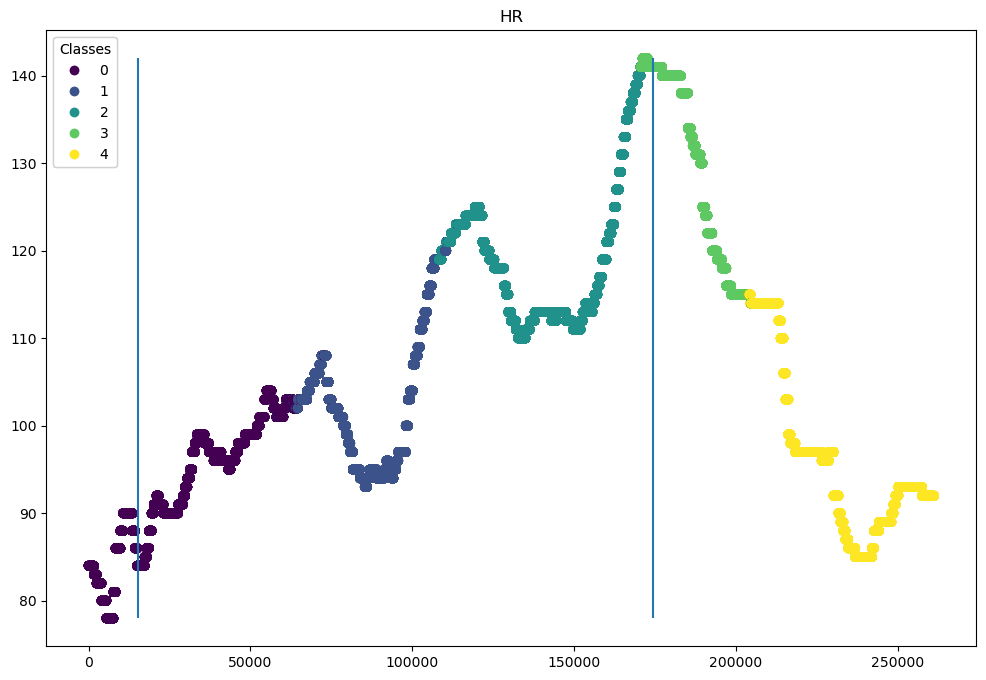

In [11]:
from sklearn_som.som import SOM
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle

data = scaled_eeg_data
brain_som = SOM(m=5, n=1, dim=63)
brain_som.fit(data)
preds = brain_som.predict(data)

bio_list = ['HR']
for i in bio_list:
    
#     fig, ax = plt.subplots(figsize=(12,8))
#     scatter = ax.scatter(brain_df.index, brain_df[i], c=preds)
#     legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
#     ax.add_artist(legend1)
#     for j,k in enumerate(vals):
#         plt.vlines(x=k, ymin=min(brain_df[i]), ymax=max(brain_df[i]), label=labels[j], colors=lab_colors[j])
#     plt.legend()
    
    fig, ax = plt.subplots(figsize=(12,8))
    scatter = ax.scatter(brain_df.index, brain_df[i], c=preds)
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
    ax.add_artist(legend1)
    plt.vlines(x=[trig_start, trig_end], ymin=min(brain_df[i]), ymax=max(brain_df[i]))
    # plt.plot(brain_df['TRIGGER'])
    # , marker=MarkerStyle("o", fillstyle='none'))
    plt.title(i)
plt.show()

In [10]:
import mne
import numpy as np
import pandas as pd

# import functions
from scipy import signal

eeg_df['preds'] = preds

bands = {'Delta': (1, 3),
         'Theta': (4, 7),
         'Alpha': (8, 12),
         'Beta': (13, 25),
         'Gamma': (26, 45)}
pred_class = [0, 1, 2, 3, 4]

import matplotlib.pyplot as plt

psd = []
idx_name = []


for i in pred_class:
    data = eeg_df.loc[eeg_df['preds'] == i]
    # bands_df = 0
    # print(data)
    eeg_list = []
    
    for j in data.columns:
        
        # idx_name.append(j)
        # print(idx_name)
        eeg_bands = dict()
        if j == 'preds':
            continue
        else:
            freq_arr, psd_arr = signal.welch(data[j].values, 500)
            
            for b in bands:
                # Find frequency match with EEG bands
                freq_ix = np.where((freq_arr >= bands[b][0]) & (freq_arr <= bands[b][1]))

                # Calculate the mean of power spectrum value
                eeg_bands[b] = np.mean(psd_arr[freq_ix])
                # print(eeg_bands)
                # print(idx_name)
            eeg_list.append(eeg_bands)
        bands_df = pd.DataFrame(eeg_list, columns=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])
        
    bands_df.index = data.columns.tolist()[:-1]
    print(f"For class: {i}, regions with high activity on different bands")
    for i in bands_df.columns:
        print(bands_df.sort_values(by=i, ascending=False).head(3).loc[:,i])
            # print(max(bands_df[i]))
        
            # psd.append(psd_arr)
            # print(pd.DataFrame(psd).head())
        # plt.plot(psd_arr)
        # plt.show()   

<ipython-input-10-bb7b58a12603>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eeg_df['preds'] = preds


For class: 0, regions with high activity on different bands
AF7     1.291039e-09
F7      1.240052e-09
FT10    8.947259e-10
Name: Delta, dtype: float64
Fp1    1.013044e-10
Fp2    8.558384e-11
Fpz    6.130313e-11
Name: Theta, dtype: float64
C1     3.132895e-11
Fp1    1.616607e-11
F7     9.666917e-12
Name: Alpha, dtype: float64
C1     1.109261e-11
Fp1    5.058264e-12
F7     3.601080e-12
Name: Beta, dtype: float64
FT7    4.454792e-12
C1     3.838197e-12
FT8    3.021266e-12
Name: Gamma, dtype: float64
For class: 1, regions with high activity on different bands
FT10    1.010447e-08
AF7     2.232911e-09
Fp1     1.221191e-09
Name: Delta, dtype: float64
FT10    3.381867e-10
AF7     9.394559e-11
C1      8.840646e-11
Name: Theta, dtype: float64
FT10    6.287008e-11
C1      2.013165e-11
Fp2     8.545793e-12
Name: Alpha, dtype: float64
FT10    1.969381e-11
C1      1.552938e-11
AF7     3.893008e-12
Name: Beta, dtype: float64
FT7     8.071375e-12
TP7     6.407277e-12
FT10    6.271263e-12
Name: Gamma,

# SOM on Biometrics

In [61]:
30*500

15000

In [10]:
game_start = 15000
game_end = 185060
# vid_start = 15060

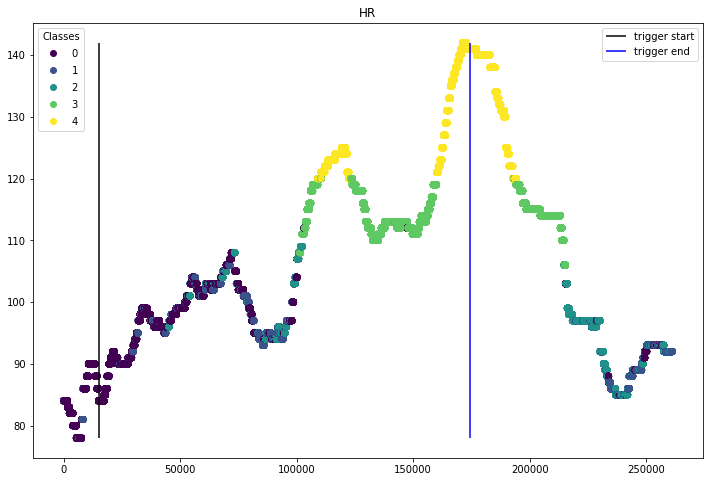

In [19]:
from sklearn_som.som import SOM
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle

data = scaled_bio_data
brain_som = SOM(m=5, n=1, dim=7)
brain_som.fit(data)
preds = brain_som.predict(data)


bio_list = ['HR']
labels=["trigger start", "trigger end"]
vals=[trig_start, trig_end]
lab_colors = ['k', 'b']
for i in bio_list:
    fig, ax = plt.subplots(figsize=(12,8))
    scatter = ax.scatter(brain_df.index, brain_df[i], c=preds)
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
    ax.add_artist(legend1)
    for j,k in enumerate(vals):
        plt.vlines(x=k, ymin=min(brain_df[i]), ymax=max(brain_df[i]), label=labels[j], colors=lab_colors[j])
    plt.legend()
    
    # plt.vlines(x=[game_start, trig_start, trig_end, game_end], ymin=min(brain_df[i]), ymax=max(brain_df[i]), label=["game start", "trigger start", "trigger end", "game end"])
    # plt.legend()
    # plt.plot(brain_df['TRIGGER'])
    # , marker=MarkerStyle("o", fillstyle='none'))
    plt.title(i)
plt.show()

In [ ]:
# EEG recording start time
# 0s EEG
# 2022-01-14 18:43:28.808

# Tobii Start
# 43 s later, 0:43 m:s EEG
# 0s VIDEO
# 2022-01-14 18:44:11

# EEG Trigger Start 
# 73.26 s later, 1:13 m:s EEG
# 30s VIDEO
# 2022-01-14 18:44:42

# EEG Trigger End
# 390.96 s later, 6:31 m:s EEG
# 347.96s VIDEO, 5:48 m:s 
# 2022-01-14 18:50:00

# Tobii End
# 
# 2022-01-14 18:52:46

In [26]:
import mne
import numpy as np
import pandas as pd

# import functions
from scipy import signal

# POWER SPECTRUM ON EEG DATA

In [22]:
eeg_df['preds'] = preds

C:\anaconda\envs\adele\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
eeg_df.loc[eeg_df['preds'] == 4]

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,FT8,TP7,TP8,PO7,PO8,Fpz,CPz,POz,TP10,preds
108978,-0.006780,-0.001491,-0.000851,0.001211,0.004086,-0.000188,0.001280,-0.000827,-0.001683,-0.000740,...,-0.006087,-0.005759,-0.003331,0.002146,-0.000539,-0.004253,-0.001297,0.011469,-0.007268,4
108979,-0.006791,-0.001495,-0.000852,0.001210,0.004092,-0.000187,0.001286,-0.000825,-0.001677,-0.000736,...,-0.006096,-0.005755,-0.003335,0.002149,-0.000535,-0.004256,-0.001294,0.011473,-0.007262,4
108980,-0.006790,-0.001495,-0.000853,0.001213,0.004088,-0.000184,0.001282,-0.000823,-0.001677,-0.000739,...,-0.006093,-0.005753,-0.003332,0.002147,-0.000539,-0.004256,-0.001295,0.011471,-0.007268,4
108981,-0.006787,-0.001496,-0.000854,0.001210,0.004079,-0.000185,0.001279,-0.000822,-0.001673,-0.000737,...,-0.006084,-0.005750,-0.003331,0.002148,-0.000537,-0.004257,-0.001297,0.011469,-0.007265,4
108982,-0.006787,-0.001494,-0.000854,0.001208,0.004078,-0.000189,0.001281,-0.000821,-0.001671,-0.000736,...,-0.006079,-0.005745,-0.003331,0.002148,-0.000536,-0.004255,-0.001295,0.011471,-0.007265,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194135,-0.004337,-0.001539,-0.001131,0.000865,0.004187,-0.000321,0.001187,-0.000864,-0.001685,-0.000764,...,-0.005268,-0.005485,-0.003166,0.001967,-0.000799,-0.004152,-0.001121,0.011463,-0.006769,4
194136,-0.004334,-0.001539,-0.001132,0.000864,0.004186,-0.000324,0.001187,-0.000864,-0.001690,-0.000771,...,-0.005269,-0.005476,-0.003164,0.001963,-0.000803,-0.004154,-0.001122,0.011459,-0.006768,4
194137,-0.004329,-0.001534,-0.001130,0.000868,0.004185,-0.000325,0.001185,-0.000871,-0.001693,-0.000782,...,-0.005262,-0.005470,-0.003182,0.001959,-0.000814,-0.004152,-0.001121,0.011457,-0.006773,4
194138,-0.004344,-0.001538,-0.001131,0.000870,0.004188,-0.000324,0.001183,-0.000873,-0.001696,-0.000784,...,-0.005256,-0.005474,-0.003195,0.001957,-0.000814,-0.004153,-0.001123,0.011454,-0.006770,4


In [61]:
bands = {'Delta': (1, 3),
         'Theta': (4, 7),
         'Alpha': (8, 12),
         'Beta': (13, 25),
         'Gamma': (26, 45)}
pred_class = [0, 1, 2, 3, 4]

import matplotlib.pyplot as plt

psd = []
idx_name = []


for i in pred_class:
    data = eeg_df.loc[eeg_df['preds'] == i]
    # bands_df = 0
    # print(data)
    eeg_list = []
    
    for j in data.columns:
        
        # idx_name.append(j)
        # print(idx_name)
        eeg_bands = dict()
        if j == 'preds':
            continue
        else:
            freq_arr, psd_arr = signal.welch(data[j].values, 500)
            
            for b in bands:
                # Find frequency match with EEG bands
                freq_ix = np.where((freq_arr >= bands[b][0]) & (freq_arr <= bands[b][1]))

                # Calculate the mean of power spectrum value
                eeg_bands[b] = np.mean(psd_arr[freq_ix])
                # print(eeg_bands)
                # print(idx_name)
            eeg_list.append(eeg_bands)
        bands_df = pd.DataFrame(eeg_list, columns=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])
        
    bands_df.index = data.columns.tolist()[:-1]
    print(f"For class: {i}, regions with high activity on different bands")
    for i in bands_df.columns:
        print(bands_df.sort_values(by=i, ascending=False).head(3).loc[:,i])
            # print(max(bands_df[i]))
        
            # psd.append(psd_arr)
            # print(pd.DataFrame(psd).head())
        # plt.plot(psd_arr)
        # plt.show()   

For class: 0, regions with high activity on different bands
FT10    1.223567e-09
AF7     3.960451e-10
F7      3.396250e-10
Name: Delta, dtype: float64
FT10    1.473619e-10
C1      6.330035e-11
AF7     5.044727e-11
Name: Theta, dtype: float64
FT10    4.119056e-11
C1      2.737230e-11
AF7     1.251164e-11
Name: Alpha, dtype: float64
FT10    1.421754e-11
C1      1.078476e-11
AF7     4.553613e-12
Name: Beta, dtype: float64
FT10    3.992027e-12
C1      2.901565e-12
AF7     1.373381e-12
Name: Gamma, dtype: float64
For class: 1, regions with high activity on different bands
FT10    2.745494e-09
AF7     2.295531e-09
F7      1.443623e-09
Name: Delta, dtype: float64
FT10    2.621887e-10
C1      1.748086e-10
AF7     1.543891e-10
Name: Theta, dtype: float64
FT10    7.130252e-11
C1      7.002211e-11
AF7     3.334215e-11
Name: Alpha, dtype: float64
FT10    2.447598e-11
C1      2.094569e-11
F7      1.137109e-11
Name: Beta, dtype: float64
C1      8.089604e-12
FT10    6.732967e-12
AF7     4.509458e-12


In [58]:
bands_df.index = data.columns.tolist()[:-1]

In [59]:
bands_df

,Delta,Theta,Alpha,Beta,Gamma
Fp1,6.433439e-10,3.291953e-11,4.234154e-12,2.038303e-12,1.554571e-12
Fp2,4.585572e-10,4.097649e-11,4.689347e-12,2.350704e-12,1.340967e-12
F3,1.818859e-11,2.035060e-12,7.977809e-13,4.865023e-13,4.028017e-13
F4,2.676223e-11,2.557574e-12,9.767978e-13,5.273834e-13,3.287616e-13
C3,2.239660e-11,1.243835e-12,5.065843e-13,3.367457e-13,4.276973e-13
...,...,...,...,...,...
PO8,2.652207e-11,3.263806e-12,2.886037e-12,8.966546e-13,8.546861e-13
Fpz,4.264845e-10,3.429329e-11,3.408885e-12,7.616304e-13,4.376460e-13
CPz,1.504582e-11,1.683742e-12,5.393736e-13,1.692908e-13,7.227002e-14
POz,2.121385e-11,2.450628e-12,1.394718e-12,3.818782e-13,2.176191e-13


In [71]:
pd.DataFrame(psd)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,5.026547e-11,2.901105e-10,1.099639e-10,3.129131e-11,1.065428e-11,4.395274e-12,2.430916e-12,1.459630e-12,1.081317e-12,9.591967e-13,...,4.850356e-15,3.322312e-15,2.309670e-15,1.796711e-15,1.675230e-15,1.126479e-15,7.715640e-16,4.422478e-16,1.003605e-16,1.167622e-17
1,5.503674e-11,3.010548e-10,1.281812e-10,3.672756e-11,1.193843e-11,4.773561e-12,2.573591e-12,1.555944e-12,1.222431e-12,1.125136e-12,...,2.279024e-15,1.916247e-15,1.564754e-15,1.171922e-15,9.097708e-16,6.108242e-16,5.899055e-16,4.149377e-16,8.570965e-17,1.073041e-17
2,2.249718e-12,1.243239e-11,5.516209e-12,1.849707e-12,8.882759e-13,8.448351e-13,8.248773e-13,4.365182e-13,2.949689e-13,2.810353e-13,...,1.468623e-15,1.273655e-15,1.120145e-15,7.834447e-16,5.459825e-16,3.676631e-16,4.943608e-16,3.728875e-16,6.930734e-17,1.022869e-17
3,3.244813e-12,1.692972e-11,7.565466e-12,2.501433e-12,1.132824e-12,9.621232e-13,8.669563e-13,4.793330e-13,3.721894e-13,3.578080e-13,...,1.073423e-15,8.721486e-16,7.268334e-16,5.479149e-16,4.171153e-16,2.866643e-16,3.762554e-16,2.923616e-16,5.888489e-17,7.956831e-18
4,1.511823e-12,1.080192e-11,3.222378e-12,1.062107e-12,5.644135e-13,5.136843e-13,5.291819e-13,3.484865e-13,2.791518e-13,2.816666e-13,...,3.462225e-15,2.679674e-15,2.156001e-15,1.626303e-15,1.116867e-15,7.311130e-16,5.378639e-16,3.353641e-16,8.365507e-17,1.114638e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,3.403470e-12,1.901079e-11,8.484848e-12,3.191106e-12,1.909133e-12,2.775614e-12,2.993977e-12,1.337628e-12,7.086433e-13,5.532184e-13,...,3.955077e-15,3.095446e-15,2.376706e-15,1.780425e-15,1.294501e-15,8.110097e-16,5.029278e-16,2.762003e-16,8.375895e-17,9.861819e-18
311,4.729148e-11,2.351245e-10,1.014773e-10,2.797485e-11,9.034273e-12,3.685426e-12,1.952719e-12,9.375090e-13,5.984271e-13,4.363506e-13,...,1.291160e-15,1.060905e-15,8.607360e-16,6.389335e-16,5.236937e-16,3.516036e-16,4.849810e-16,3.800497e-16,7.343289e-17,9.805686e-18
312,1.650597e-12,9.521502e-12,4.165509e-12,1.492933e-12,7.019894e-13,5.317829e-13,4.229343e-13,2.415991e-13,1.572265e-13,1.246530e-13,...,3.932504e-16,3.265945e-16,2.761330e-16,2.241772e-16,2.036557e-16,1.478853e-16,3.160439e-16,2.749143e-16,5.115762e-17,7.262721e-18
313,2.659095e-12,1.451637e-11,6.349525e-12,2.496065e-12,1.399240e-12,1.518386e-12,1.494747e-12,6.452012e-13,3.415230e-13,2.747562e-13,...,8.865291e-16,7.488250e-16,5.894416e-16,4.402278e-16,3.745494e-16,2.680014e-16,5.071097e-16,4.284051e-16,7.668446e-17,1.114928e-17
